## Практическое задание Урок 3. Классификация. Логистическая регрессия

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [277]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [278]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [279]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [280]:
def calc_logloss(y, y_pred):
    #ограничение минимального и максимального значений в массиве numpy методом clip позволить избежать попадания нулевых значений с необходимой точностью
    y_pred = np.clip(y_pred, 1e-3, 1 - 1e-3)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [281]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [282]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [283]:
z = np.linspace(-10, 10, 101)

In [284]:
probabilities = sigmoid(z)

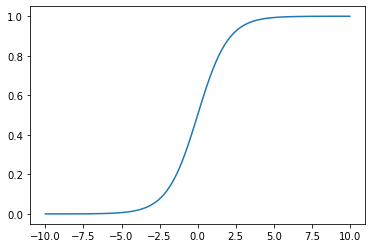

In [285]:
plt.plot(z, probabilities)
plt.show()

### Logistic Regression

In [296]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [297]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-4)

500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
1500 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.7651177745022372
2500 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105478
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442176
3500 [ 0.39088925 -0.53321212  0.63401986  1.36601535] 0.6097021563515638
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
4500 [ 0.37108342 -0.59102182  0.63446603  1.3413119 ] 0.5657147376221167
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.5532737788236778


#### 1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

Зададим ограничения для минимального и максимального значений в массиве numpy методом clip. Вычитал тут https://pythobyte.com/numpy-clip-22378/

y_pred = np.clip(y_pred, 1e-3, 1 - 1e-3) изменил функцию выше

#### 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [288]:
def eval_model(X, y, iterations, alpha=1e-4, tolerance = 1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    log_loss = []
    weights = []
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        weights.append(W)
        log_loss.append(err)
        if i % (iterations / 10) == 0:
            print(i, W, err)
        if len(log_loss) > 1:
            if np.abs(log_loss[i-1] - log_loss[i-2]) < tolerance:
                break
    
    return log_loss, weights

In [289]:
W = eval_model(X_st, y, iterations=10000, alpha=1e-4)

1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.7651177745022372
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442176
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.5532737788236778
6000 [ 0.34724493 -0.64428604  0.63950214  1.31709536] 0.5382699679862313
7000 [ 0.33392304 -0.66622261  0.64455     1.30647839] 0.5302315923314023
8000 [ 0.32197446 -0.68155431  0.65033581  1.29872639] 0.5254856093840207
9000 [ 0.31103622 -0.69239308  0.65656088  1.29302103] 0.5223857437920391
10000 [ 0.30086145 -0.7000972   0.6630387   1.28881227] 0.5201522304551885


In [290]:
def plot_err(log_loss, weights):
    fig= plt.figure(figsize=(15,5))
    plt.suptitle(f'Optional rounds: {len(log_loss)}, Errors: {round(log_loss[-1], 2)}', size = 15)
    
    plt.subplot(121)
    plt.plot(log_loss, linewidth = 3)
    plt.xlabel('n_iterations', size = 15)
    plt.ylabel('error', size = 15)
    
    plt.subplot(122)
    plt.plot(weights, linewidth = 3)
    plt.legend([f'$w_{i}$' for i in range(len(weights[0]))], loc = 'best',fontsize = 15)
    plt.xlabel('n_iterations', size = 15)
    plt.ylabel('w', size = 15)
    plt.show()

1000 [-7.45770662 -1.13952545 -1.38116181  6.55470777] 0.2698163959605314
2000 [-10.74690483  -1.38416322  -2.42154793   9.13598506] 0.23216273551485012
3000 [-13.27474073  -1.59511144  -3.18818218  11.17211031] 0.20990944642572235
4000 [-15.42904321  -1.78154353  -3.82925471  12.91883838] 0.19369029014786854
5000 [-17.32873106  -1.94875871  -4.38792531  14.46232766] 0.18108060185014913
6000 [-19.03349251  -2.10030208  -4.88501181  15.84832263] 0.17091477043530726
7000 [-20.58152892  -2.23879972  -5.33342406  17.10698139] 0.16252302627767828
8000 [-22.00021122  -2.36628577  -5.74219365  18.260233  ] 0.15547415964476083
9000 [-23.31027053  -2.48437302  -6.1180364   19.32481289] 0.14946505958315004
10000 [-24.52791135  -2.59436019  -6.46612462  20.31385673] 0.1442763125147845


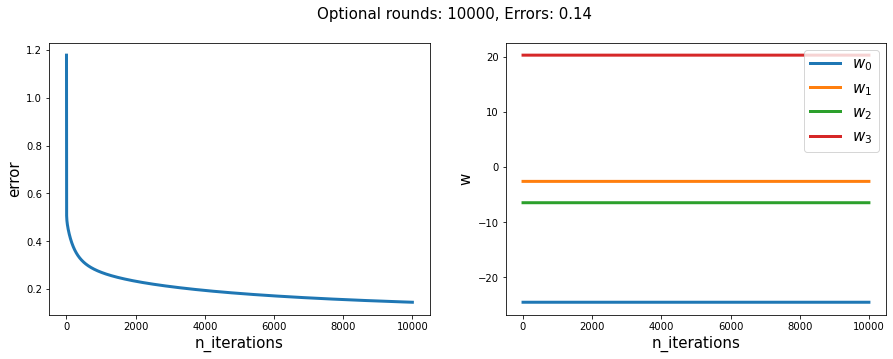

1000 [-4.27750051 -0.9816614  -0.27448097  4.26265815] 0.3266840535965657
2000 [-6.58615519 -1.08575519 -1.09119709  5.89881304] 0.28254192283566193
3000 [-8.22385533 -1.19156936 -1.63000041  7.14370039] 0.2597595172566012
4000 [-9.56704975 -1.29089433 -2.0557678   8.19667204] 0.24420638347830753
5000 [-10.74514777  -1.38402169  -2.42100695   9.13458005] 0.2321635162188355
6000 [-11.81433203  -1.47181149  -2.74763502   9.99297564] 0.2222395995343644
7000 [-12.80329734  -1.55496555  -3.046576    10.79084996] 0.2137428472668558
8000 [-13.72863234  -1.63401847  -3.3240288   11.53959677] 0.20630177472816746
9000 [-14.60094036  -1.70938852  -3.58389036  12.24673974] 0.1996649951042861
10000 [-15.42758101  -1.78141575  -3.82882239  12.91765126] 0.19369207674727923


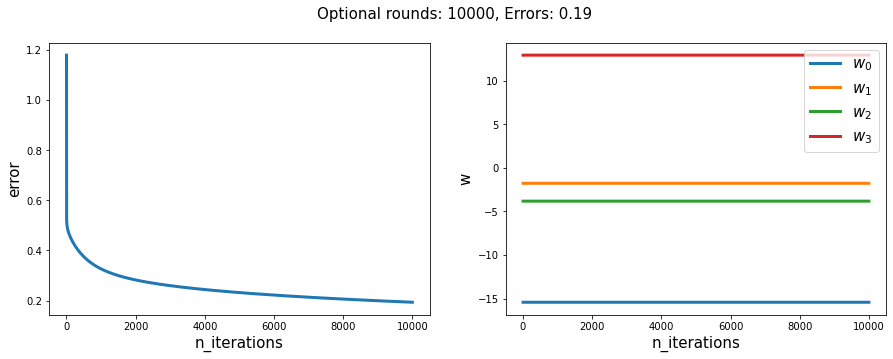

1000 [-2.51890703 -0.94532648  0.40019222  3.1328895 ] 0.3754024229306205
2000 [-4.27681634 -0.98164328 -0.27422187  4.26220436] 0.326665613183083
3000 [-5.56076732 -1.03176261 -0.73834345  5.15161751] 0.29993943858464905
4000 [-6.58552026 -1.08572008 -1.09098018  5.89834449] 0.28253722160829253
5000 [-7.45498358 -1.13935179 -1.38026181  6.55264038] 0.2698091230218947
6000 [-8.22327431 -1.19152909 -1.62981255  7.14325118] 0.25975766583006876
7000 [-8.92095397 -1.24201876 -1.85242158  7.68747117] 0.25140152082105877
8000 [-9.56650604 -1.29085277 -2.0555972   8.19624232] 0.24420551648738917
9000 [-10.17175595  -1.33813507  -2.24403962   8.67680974] 0.23785303497419452
10000 [-10.744631    -1.38398009  -2.42084781   9.13416686] 0.23216310961859737


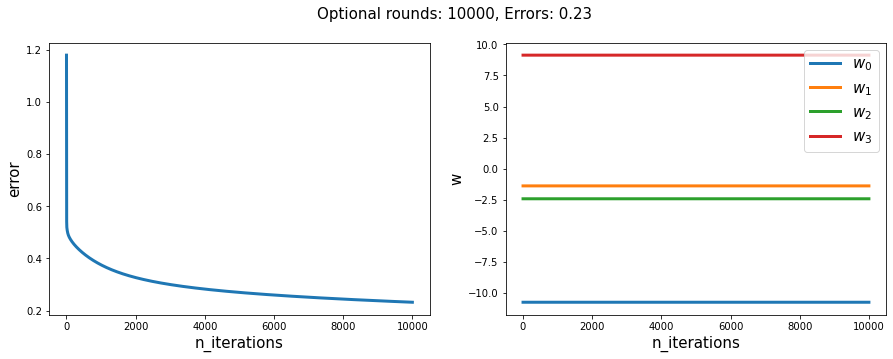

1000 [-1.33893968 -0.91238816  0.82188129  2.38372667] 0.4182162832904604
2000 [-2.51861495 -0.94529042  0.40024623  3.1326564 ] 0.37537773945136843
3000 [-3.47733824 -0.96133852  0.02860425  3.73724089] 0.34682520548206675
4000 [-4.27648052 -0.98163446 -0.2740946   4.26198173] 0.32665625116765107
5000 [-4.96059964 -1.0057052  -0.52476468  4.7289467 ] 0.3116401085955892
6000 [-5.56043888 -1.03174858 -0.73822577  5.15138554] 0.2999350451366534
7000 [-6.097085   -1.05862186 -0.92464679  5.53877058] 0.2904554942373674
8000 [-6.58520679 -1.08570276 -1.09087307  5.89811319] 0.2825348092493405
9000 [-7.03522047 -1.11266304 -1.24160635  6.23466685] 0.27574658382221207
10000 [-7.45468424 -1.13933276 -1.38016277  6.55241323] 0.2698076500269753


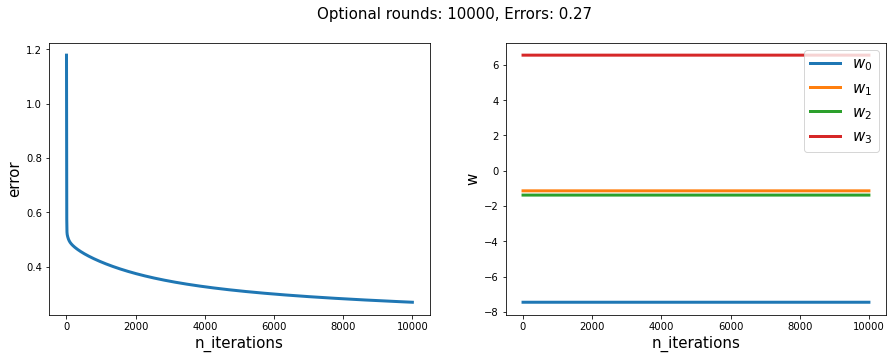

1000 [-0.1669589  -0.75349668  0.95162197  1.46323139] 0.47648567288032373
2000 [-0.49166468 -0.82099927  0.98636221  1.74699589] 0.4571714465185407
3000 [-0.78798431 -0.86580831  0.95545209  1.98911744] 0.4421983321401104
4000 [-1.06976183 -0.89413688  0.89609267  2.19777793] 0.42945810741863727
5000 [-1.33877824 -0.91225125  0.82169045  2.38341031] 0.4181820718667145
6000 [-1.59587338 -0.92405644  0.73957269  2.55268721] 0.40801465324128755
7000 [-1.84174662 -0.93197998  0.6541467   2.70986082] 0.3987602556280108
8000 [-2.07704716 -0.93755922  0.56812557  2.8577239 ] 0.39029217327200094
9000 [-2.30239445 -0.94177715  0.48317429  2.99816059] 0.3825166651011162
10000 [-2.51838389 -0.94526222  0.40028955  3.13247255] 0.3753579132752236


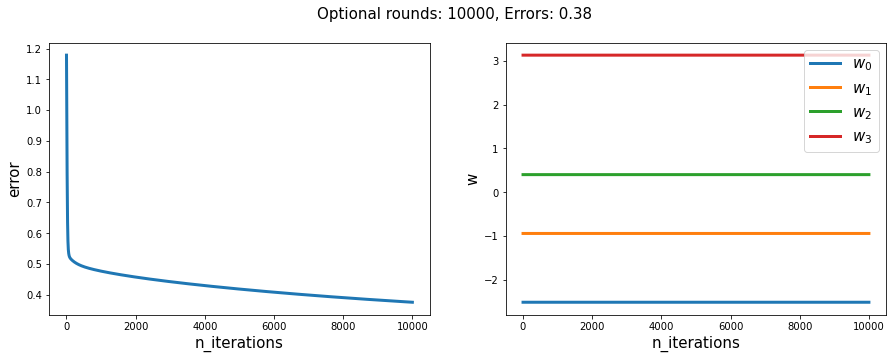

1000 [ 0.04038985 -0.72057507  0.85808106  1.3269337 ] 0.49101736263059026
2000 [-0.16692006 -0.75345822  0.9514891   1.46317089] 0.4764788501542296
3000 [-0.33554027 -0.7899264   0.98216173  1.60958735] 0.466018626041942
4000 [-0.49164942 -0.82096061  0.98628565  1.74692762] 0.45716557281693604
5000 [-0.64186579 -0.84592998  0.97568372  1.87298775] 0.44932146049104427
6000 [-0.78796941 -0.86577803  0.95540008  1.98906009] 0.44219306424864735
7000 [-0.93051789 -0.88154862  0.92823926  2.09682428] 0.43560685913168334
8000 [-1.06974438 -0.89411416  0.89605699  2.19773098] 0.42945334993600026
9000 [-1.20578838 -0.90416325  0.86019538  2.29294103] 0.4236602498084621
10000 [-1.33875821 -0.9122344   0.82166703  2.38337128] 0.4181777866870406


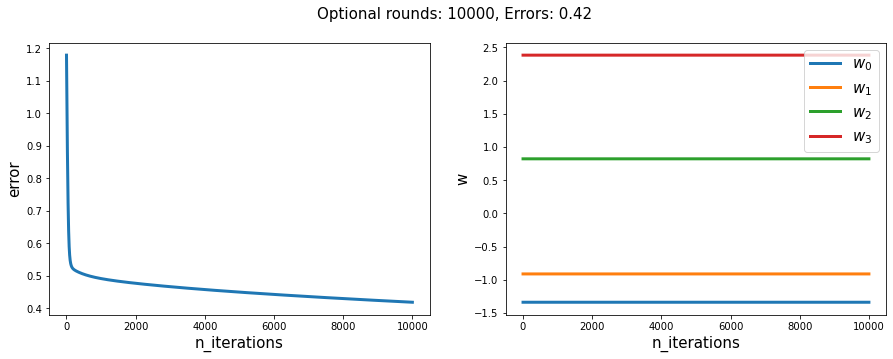

1000 [ 0.30083082 -0.70020013  0.66305954  1.28877856] 0.5201575151201117
2000 [ 0.21870602 -0.71697225  0.72736419  1.28031664] 0.5084341429652819
3000 [ 0.15157573 -0.71596133  0.78089164  1.28995255] 0.5009411414973186
4000 [ 0.09283229 -0.71710669  0.82370017  1.30616192] 0.4953776394090104
5000 [ 0.04044622 -0.72055218  0.85793303  1.32690312] 0.491009738609497
6000 [-0.00703345 -0.72562701  0.8853952   1.3509072 ] 0.48739354564103887
7000 [-0.05073449 -0.73179651  0.90749857  1.37719476] 0.4842626564166205
8000 [-0.09152692 -0.73866572  0.92533519  1.40501425] 0.4814572811089651
9000 [-0.13007629 -0.74594592  0.93974701  1.43379798] 0.47888071729291254
10000 [-0.16688902 -0.75342768  0.95138327  1.46312287] 0.4764733727784173


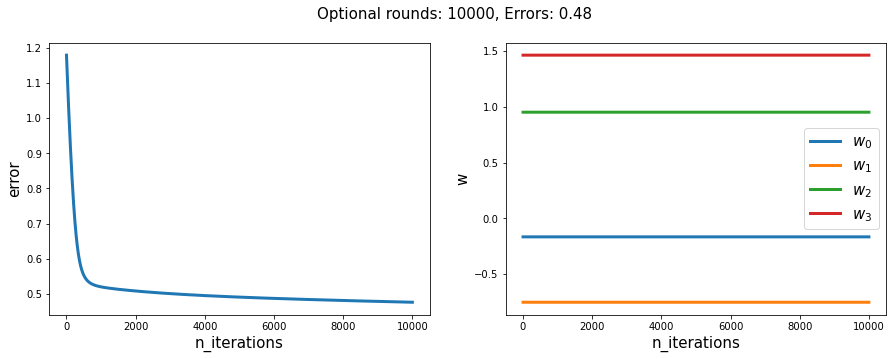

1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.7651177745022372
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442176
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.5532737788236778
6000 [ 0.34724493 -0.64428604  0.63950214  1.31709536] 0.5382699679862313
7000 [ 0.33392304 -0.66622261  0.64455     1.30647839] 0.5302315923314023
8000 [ 0.32197446 -0.68155431  0.65033581  1.29872639] 0.5254856093840207
9000 [ 0.31103622 -0.69239308  0.65656088  1.29302103] 0.5223857437920391
10000 [ 0.30086145 -0.7000972   0.6630387   1.28881227] 0.5201522304551885


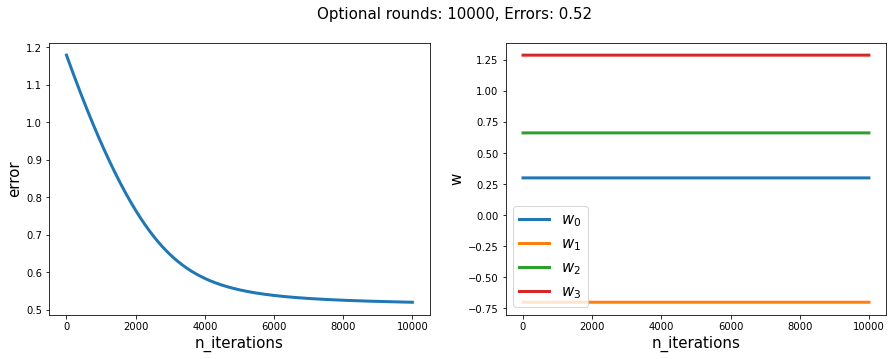

1000 [ 0.49293883 -0.15271095  0.64740417  1.5173911 ] 1.1531375123467569
2000 [ 0.48920116 -0.16703036  0.64709878  1.51179877] 1.128098712337577
3000 [ 0.48550196 -0.18121814  0.6467726   1.50625436] 1.1035157510113354
4000 [ 0.48184196 -0.19526992  0.64642601  1.50075937] 1.0793989183851267
5000 [ 0.47822191 -0.20918125  0.6460595   1.49531539] 1.055758230052698
6000 [ 0.47464249 -0.22294764  0.64567372  1.48992402] 1.0326034903658223
7000 [ 0.47110438 -0.2365645   0.64526946  1.48458693] 1.0099443664178465
8000 [ 0.46760821 -0.25002711  0.64484766  1.47930586] 0.9877904686676005
9000 [ 0.4641546  -0.26333059  0.64440943  1.47408265] 0.9661514328926198
10000 [ 0.46074414 -0.27646983  0.64395606  1.46891921] 0.9450369970710211


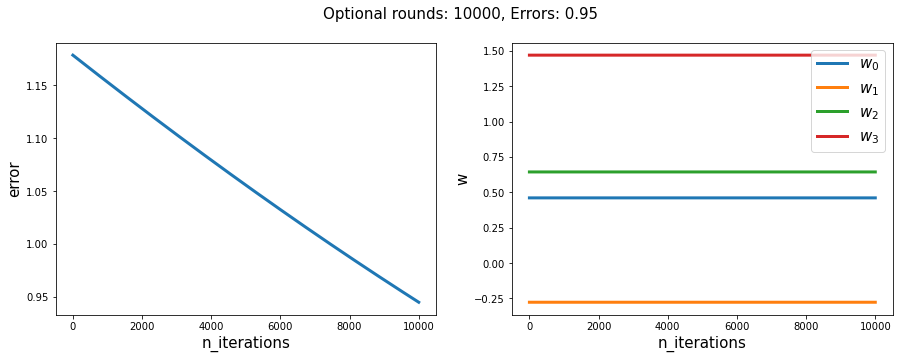

In [291]:
for alpha in [0.5, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0001, 0.00001]:
    W = eval_model(X_st, y, iterations=10000, alpha=alpha, tolerance = 1e-6)
    plot_err(W[0], W[1])

#### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.

При использовании такой функции $\tilde{b}(x_{i}) = \sigma(\left \langle w,x_{i} \right \rangle)$ получаем, что вероятность отнесения объекта к классу «+1» $P(y=1|x)$, которую для краткости обозначим $p_{+}$, будет равняться

$$p_{+} = \sigma(\left \langle w,x_{i} \right \rangle) = \frac{1}{1 + exp(-\left \langle w,x_{i} \right \rangle)}$$

Чем больше будет скалярное произведение $\left \langle w,x_{i} \right \rangle$, тем выше окажется предсказанная вероятность.

In [298]:
def calc_pred_proba (W, X):
    y_pred_proba = 1/(1 + np.exp(-(np.dot(W,X))))
    return y_pred_proba

In [299]:
calc_pred_proba(W, X_st)

array([0.61284043, 0.67292861, 0.81854116, 0.13481741, 0.85958229,
       0.81228146, 0.87916144, 0.39610207, 0.59717774, 0.86226561])

#### 4. Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.

def calc_pred(W, X):
    cl_proba = calc_pred_proba(W, X)
    y_pred = []
    for i in range(len(cl_proba)):
        if (cl_proba[i] > 0.5): 
            y_pred.append(1)
        elif (cl_proba[i] <= 0.5):
            y_pred.append(0)
    return y_pred

In [331]:
def calc_pred(W, X):
    y_pred = calc_pred_proba(W, X)
    y_pred = np.where(y_pred > 0.5, 1, 0 )
    return y_pred

In [349]:
y_pred = calc_pred(W, X_st)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

#### 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [342]:
conf_matrix = np.array(pd.crosstab(y, y_pred)) # матрица ошибок
conf_matrix

array([[2, 3],
       [0, 5]])

In [346]:
precition = conf_matrix[1,1]/(conf_matrix[1,1] + conf_matrix[0,1]) # точность 
precition

0.625

In [347]:
recall = conf_matrix[1,1]/(conf_matrix[1,1] + conf_matrix[1,0]) # полнота
recall

1.0

In [348]:
F = 2 * precition * recall / (precition + recall)
F

0.7692307692307693

In [344]:
def metrics(y, y_pred):
    TP = ((y == 1) & (y_pred == 1)).sum()
    TN = ((y == 0) & (y_pred == 0)).sum()
    FN = ((y == 1) & (y_pred == 0)).sum()
    FP = ((y == 0) & (y_pred == 1)).sum()
    print(f'TP={TP}, TN={TN}, FN={FN}, FP={FP}')
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    recall = TP / (TP + FN)  
    precision = TP / (TP + FP)  
    f1_score = 2 * (precision * recall) / (precision + recall)
    return accuracy, precision, recall, f1_score

In [345]:
metrics(y, y_pred)

TP=5, TN=2, FN=0, FP=3


(0.7, 0.625, 1.0, 0.7692307692307693)

In [352]:
import sklearn.metrics
r = sklearn.metrics.confusion_matrix(y, y_pred)
print(r)

[[2 3]
 [0 5]]
